In [60]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
main_directory = "./data"

class CSVReader:
    root = None
    dirs = []
    files = []
    
    def __init__(self, folder_path):
        self.folder_path = folder_path

    def read_csv_files(self):
        dataframes = []
        for self.root, self.dirs, self.files in os.walk(self.folder_path):
            for file in self.files:
                if file.endswith('.csv'):
                    file_path = os.path.join(self.root, file)
                    df = pd.read_csv(file_path)
                    dataframes.append(df)
        return dataframes

In [44]:
csv_reader = CSVReader(main_directory)
df = csv_reader.read_csv_files()
inertia = pd.DataFrame()
cluster_numbers_range = range(1, 11)
dfs = []

for k in cluster_numbers_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(df[0])
    df_temp = pd.DataFrame({'Inertia': [kmeans.inertia_], 'Number of clusters': [k]})
    dfs.append(df_temp)

inertia = pd.concat(dfs, ignore_index=True)

print(inertia)


      Inertia  Number of clusters
0  858.964542                   1
1  362.775149                   2
2  284.934989                   3
3  217.187361                   4
4  178.058206                   5
5  147.569677                   6
6  134.102955                   7
7  117.247704                   8
8  104.411781                   9
9   98.325257                  10


<Axes: xlabel='Number of clusters', ylabel='Inertia'>

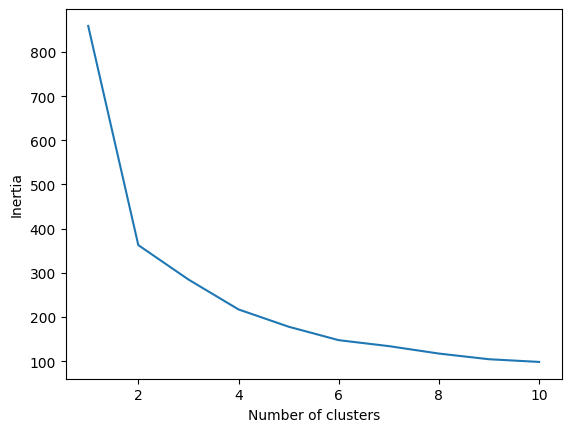

In [53]:
sns.lineplot(data=inertia, x='Number of clusters', y='Inertia')

In [55]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(df[0])

In [61]:
#pca
pca = PCA(n_components=2)
pca.fit(df[1])

PCA(n_components=2)

In [65]:
inertia_2 = pd.DataFrame()
dfs = []

for k in cluster_numbers_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(pca.components_)
    df_temp = pd.DataFrame({'Inertia': [kmeans.inertia_], 'Number of clusters': [k]})
    dfs.append(df_temp)

inertia_2 = pd.concat(dfs, ignore_index=True)

print(inertia_2)

ValueError: n_samples=2 should be >= n_clusters=3.

<Axes: xlabel='Number of clusters', ylabel='Inertia'>

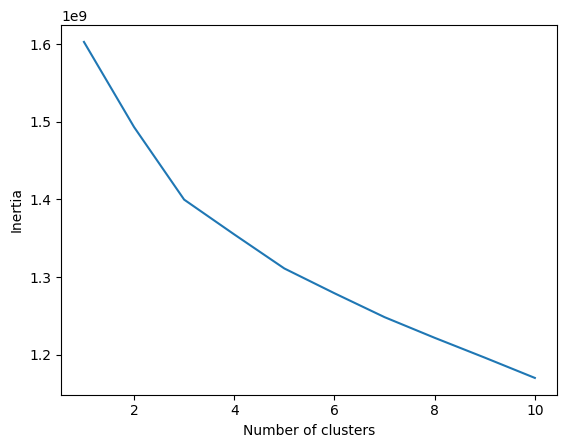

In [58]:
sns.lineplot(data=inertia_2, x='Number of clusters', y='Inertia')